<a href="https://colab.research.google.com/github/Ch-Lokesh/ML_DL_models/blob/master/iris_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris_data = pd.read_csv(url, names = names)

In [6]:
print(iris_data.shape)

(150, 5)


there are 150 instances and 5 features or attributes for each instance, last column is for label

In [7]:
iris_data.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [8]:
iris_data.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [14]:
iris_data["class"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

we have exactly same number of instances for each type of class, so let us take equal number of instances of each class in each dataset (training and testing) using the stratified splitting from sklearn

In [0]:
import sklearn.model_selection
train_data , test_data = sklearn.model_selection.train_test_split(iris_data, stratify = iris_data["class"], test_size = 0.2, random_state = 42)

In [18]:
test_data["class"].value_counts()

Iris-setosa        10
Iris-virginica     10
Iris-versicolor    10
Name: class, dtype: int64

in the test set we have 10 instances of each class i.e 30 instances in total.

In [39]:
train_x = train_data.drop("class", axis = 1)
train_x.head()

,sepal-length,sepal-width,petal-length,petal-width
8,4.4,2.9,1.4,0.2
106,4.9,2.5,4.5,1.7
76,6.8,2.8,4.8,1.4
9,4.9,3.1,1.5,0.1
89,5.5,2.5,4.0,1.3


In [41]:
train_y = train_data['class']
train_y.head()

8          Iris-setosa
106     Iris-virginica
76     Iris-versicolor
9          Iris-setosa
89     Iris-versicolor
Name: class, dtype: object

In [0]:
test_x = test_data.drop('class', axis = 1)
test_x = test_data['class']

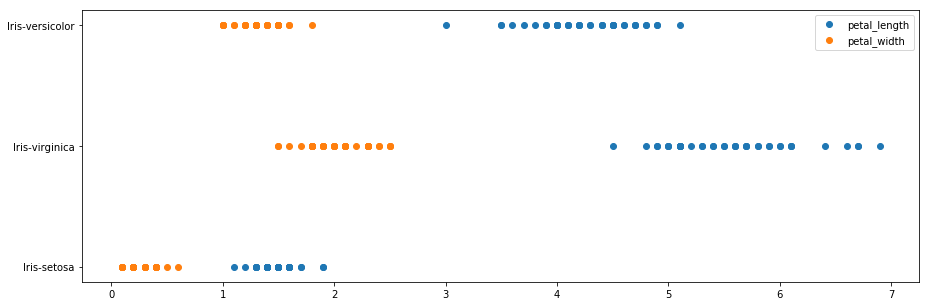

In [61]:
plt.figure(figsize = (15, 5))
plt.scatter(train_x['petal-length'], train_y, label = 'petal_length')
plt.scatter(train_x['petal-width'], train_y, label = 'petal_width')

plt.legend()
plt.show()

all most iris-versicolar and iris-virginica has same sepal width, sepal lengths of iris-versicolor and iris-virginica has same values, it will become bit diffucult to classify these two based on petal width and length

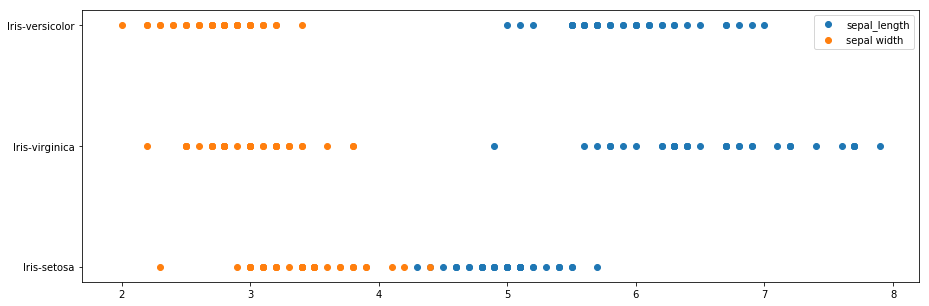

In [63]:
plt.figure(figsize=(15, 5))
plt.scatter(train_x['sepal-length'], train_y, label = 'sepal_length')
plt.scatter(train_x['sepal-width'], train_y, label = 'sepal width')
plt.legend()
plt.show()

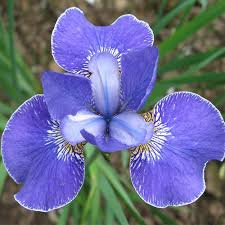

**Iris Setosa**

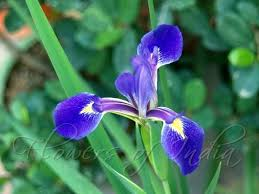

**Iris - Verginica**

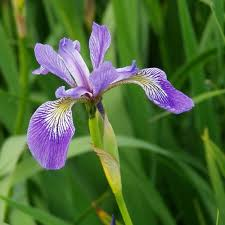

**Iris - Versicolor**

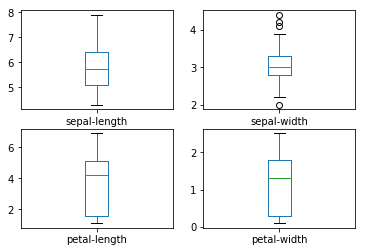

In [70]:

train_x.plot(kind = 'box', sharex = False, sharey = False, subplots = True, legend = True, layout = (2, 2))

plt.show()

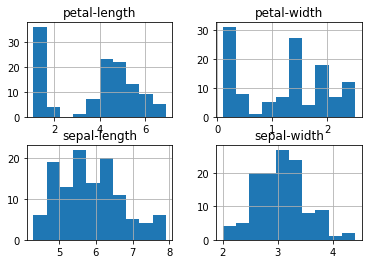

In [77]:
train_x.hist()
plt.show()

In [89]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver = 'liblinear', multi_class='ovr')
kfold = sklearn.model_selection.KFold(n_splits=10, random_state=10)
LR_results = sklearn.model_selection.cross_val_score(LR, train_x, train_y, scoring = 'accuracy', cv = kfold)
print(LR_results.mean())

0.9416666666666668


In [90]:
from sklearn.neighbors import KNeighborsClassifier
KNC = KNeighborsClassifier()
KNCf_results = sklearn.model_selection.cross_val_score(KNC, train_x, train_y, scoring='accuracy', cv = kfold)
print(KNCf_results.mean())

0.975


In [95]:
from sklearn import svm
sV = svm.SVC(gamma = 'auto')
sv_results = sklearn.model_selection.cross_val_score(sV, train_x, train_y, scoring = 'accuracy', cv = kfold)
print(sv_results.mean())

0.975
